# Flows Demo

A numerical implementation of least squares and flow-based estimation from samples $\{(x_i, y_i), i = 1, \ldots, n\}$ of the matrix $$A = \begin{bmatrix}
1 & 0 \\ 0 & -1
\end{bmatrix}
$$
where $y_i = A x_i + \sigma z_i$ for Gaussian $z_i$ with variance $\sigma^2 = 0.1$. 


In [125]:
import numpy as np 
import scipy as sp 
import scipy.linalg 
import matplotlib.pyplot as plt 

n = 20
d = 2 
noise_var = 0.1 
Y_mean_var = 0

np.random.seed(3621)

M = np.array([[-1, 0], [0, 1]])
A = M
X = np.random.normal(size=(d, n))
Y_mean = np.random.normal(size=(d, 1)) * np.sqrt(Y_mean_var/d) 
Y_true = A @ X + Y_mean
Y_noisy = Y_true + np.sqrt(noise_var/d) * np.random.normal(size=(d, n))

def arrowplot(X, Y): 
    D = Y-X
    for i in range(X.shape[1]):
        plt.arrow(X[0,i], X[1,i], D[0,i], D[1,i], color="grey", linewidth=0.1)

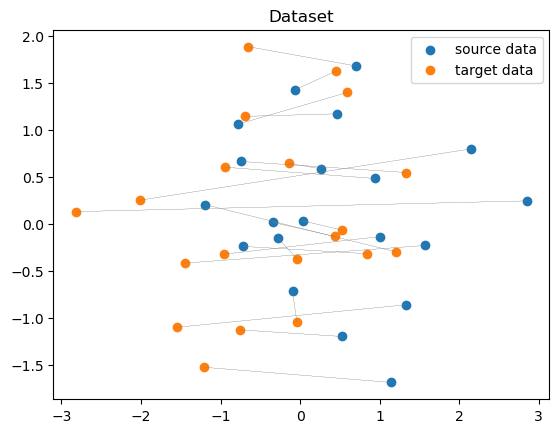

In [102]:
plt.scatter(*X, label="source data")
plt.scatter(*Y_noisy, label="target data")
arrowplot(X, Y_noisy)
plt.legend()
plt.title("Dataset")
plt.show()

Linear regression

In [88]:
B = np.linalg.lstsq(X.T, Y_noisy.T)[0]
Y_pred = B.T @ X 


/var/folders/kz/fhh7xhmx7ds_wrvlc_ddhr4m0000gn/T/ipykernel_36813/10176360.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(X.T, Y_noisy.T)[0]


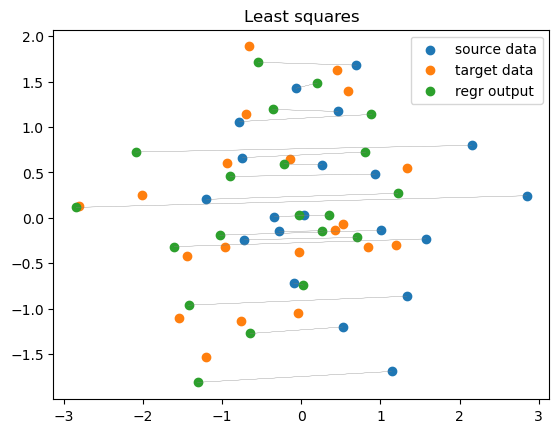

In [103]:

plt.scatter(*X, label="source data")
plt.scatter(*Y_noisy, label="target data")
plt.scatter(*Y_pred, label="regr output")
arrowplot(X, Y_pred)
plt.title("Least squares")
plt.legend()
plt.show()

In [121]:
euler_delta = 0.01
euler_tfin = 10
Nt = int(euler_tfin/euler_delta) 

F = np.zeros((Nt, d, d))
grads = np.zeros((Nt, d, d))
F[0] = np.eye(d)
for i in range(1, Nt):
    grads[i-1] = Y_noisy @ np.linalg.lstsq(F[i-1] @ X, F[i-1])[0] - F[i-1]
    F[i] = F[i-1] + euler_delta * grads[i-1]
grads[-1] = Y_noisy @ np.linalg.lstsq(F[-1] @ X, F[-1])[0] - F[-1]
Y_pred_flow = F[-1] @ X 

/var/folders/kz/fhh7xhmx7ds_wrvlc_ddhr4m0000gn/T/ipykernel_36813/841965308.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  grads[i-1] = Y_noisy @ np.linalg.lstsq(F[i-1] @ X, F[i-1])[0] - F[i-1]
/var/folders/kz/fhh7xhmx7ds_wrvlc_ddhr4m0000gn/T/ipykernel_36813/841965308.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  grads[-1] = Y_noisy @ np.linalg.lstsq(F[-1] @ X, F[-1])[0] - F[-1]


In [115]:
print("Flow matrix")
print(F[-1])
print("Regression matrix")
print(B.T)
print("Frobenius norm of difference")
print(np.linalg.norm(F[-1].flatten() - B.T.flatten()))

Flow matrix
[[-1.00382947  0.09482299]
 [-0.04821768  1.03842561]]
Regression matrix
[[-1.00391686  0.09482713]
 [-0.04821978  1.03842729]]
Frobenius norm of difference
8.752453942795703e-05


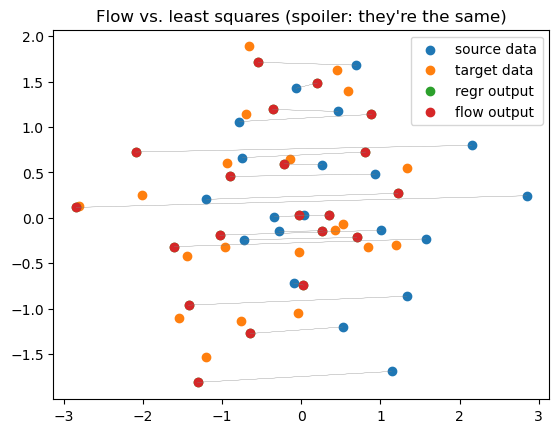

In [116]:
plt.scatter(*X, label="source data")
plt.scatter(*Y_noisy, label="target data")
plt.scatter(*Y_pred, label="regr output")
plt.scatter(*Y_pred_flow, label="flow output")
arrowplot(X, Y_pred)
plt.title("Flow vs. least squares (spoiler: they're the same)")
plt.legend()
plt.show()

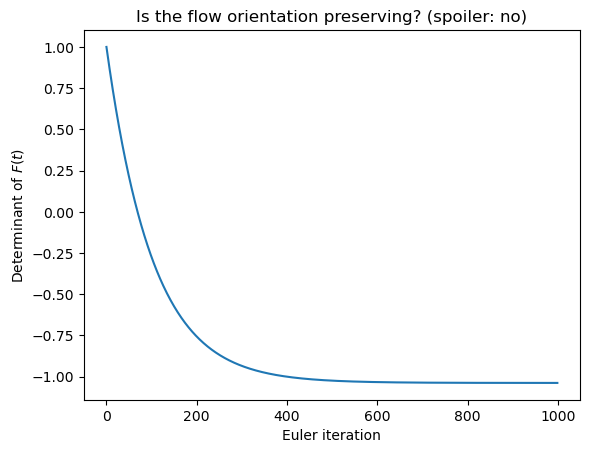

In [113]:
plt.plot(range(Nt), [np.linalg.det(F[i]) for i in range(Nt)])
plt.xlabel("Euler iteration")
plt.ylabel('Determinant of $F(t)$')
plt.title('Is the flow orientation preserving? (spoiler: no)')
plt.show()

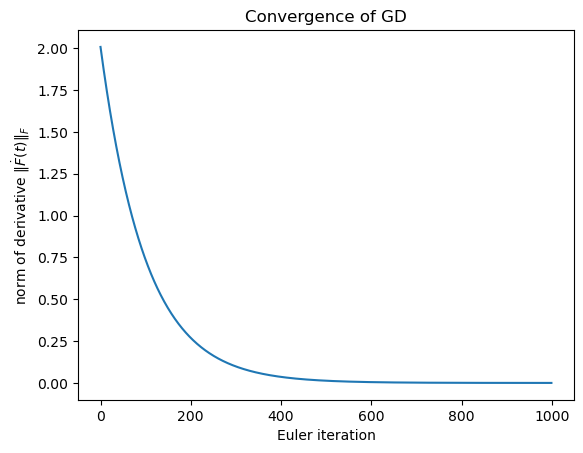

In [124]:
plt.plot(range(Nt),[np.linalg.norm(grads[i].flatten()) for i in range(Nt)])
plt.title('Convergence of GD')
plt.ylabel('norm of derivative $\|\dot{F}(t)\|_F$')
plt.xlabel('Euler iteration')
plt.show()